In [24]:
import numpy as np
import requests
from requests.auth import HTTPBasicAuth
import ast
import pandas as pd

In [25]:
counties = {
'Barnstable': '001',
'Berkshire': '003',
'Bristol': '005',
'Essex': '009',
'Franklin': '011',
'Hampden': '013',
'Hampshire': '015',
'Middlesex': '017',
'Norfolk': '021',
'Plymouth': '023',
'Suffolk': '025',
'Worcester': '027' 
}

### What counties do you want to look at? 

In [26]:
county_list = "Barnstable, Suffolk"

## Set Variables to Fetch 

In [27]:
variables = {
    "B19001_002E": "Less than\n10,000",
    "B19001_003E": "10,000 to\n14,999",
    "B19001_004E": "15,000 to\n19,999",
    "B19001_005E": "20,000 to\n24,999",
    "B19001_006E": "25,000 to\n29,999",
    "B19001_007E": "30,000 to\n34,999",
    "B19001_008E": "35,000 to\n39,999",
    "B19001_009E": "40,000 to\n44,999",
    "B19001_010E": "45,000 to\n49,999",
    "B19001_011E": "50,000 to\n59,999",
    "B19001_012E": "60,000 to\n74,999",
    "B19001_013E": "75,000 to\n99,999",
    "B19001_014E": "100,000 to\n124,999",
    "B19001_015E": "125,000 to\n149,999",
    "B19001_016E": "150,000 to\n199,999",
    "B19001_017E": "Over\n200,000"
}

In [28]:
var_list = ",".join(variables.keys())

In [29]:
if county_list != "*":
    county_list = county_list.split(", ")
    county_list = ",".join(counties[c] for c in county_list)

In [30]:
apikey = 'a5f4310141ca2f8f821d4f1a088c3d7e09381db7'

In [31]:
req = "http://api.census.gov/data/2015/acs1?get=NAME," + var_list + "&for=county:" + county_list + "&in=state:25&key=" + apikey

In [37]:
req

'http://api.census.gov/data/2015/acs1?get=NAME,B19001_005E,B19001_004E,B19001_014E,B19001_003E,B19001_002E,B19001_015E,B19001_010E,B19001_012E,B19001_013E,B19001_011E,B19001_016E,B19001_009E,B19001_008E,B19001_017E,B19001_007E,B19001_006E&for=county:001,025&in=state:25&key=a5f4310141ca2f8f821d4f1a088c3d7e09381db7'

In [32]:
r = requests.get(req)

In [33]:
x = pd.DataFrame(ast.literal_eval(r.text))
x.columns = x.iloc[0]
x = x.reindex(x.index.drop(0))

## Returned Data

In [34]:
x

,NAME,B19001_005E,B19001_004E,B19001_014E,B19001_003E,B19001_002E,B19001_015E,B19001_010E,B19001_012E,B19001_013E,B19001_011E,B19001_016E,B19001_009E,B19001_008E,B19001_017E,B19001_007E,B19001_006E,state,county
1,"Barnstable County, Massachusetts",4865,3673,9792,3317,4497,6489,3461,11972,14363,6272,5924,4016,3737,6142,4946,3985,25,001
2,"Suffolk County, Massachusetts",11799,14306,28050,21801,31907,17644,9509,23501,30829,20388,18853,11114,11138,25879,11244,12879,25,025


## Plotting

In [35]:
tableau20 = [(31, 119, 180), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (174, 199, 232), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

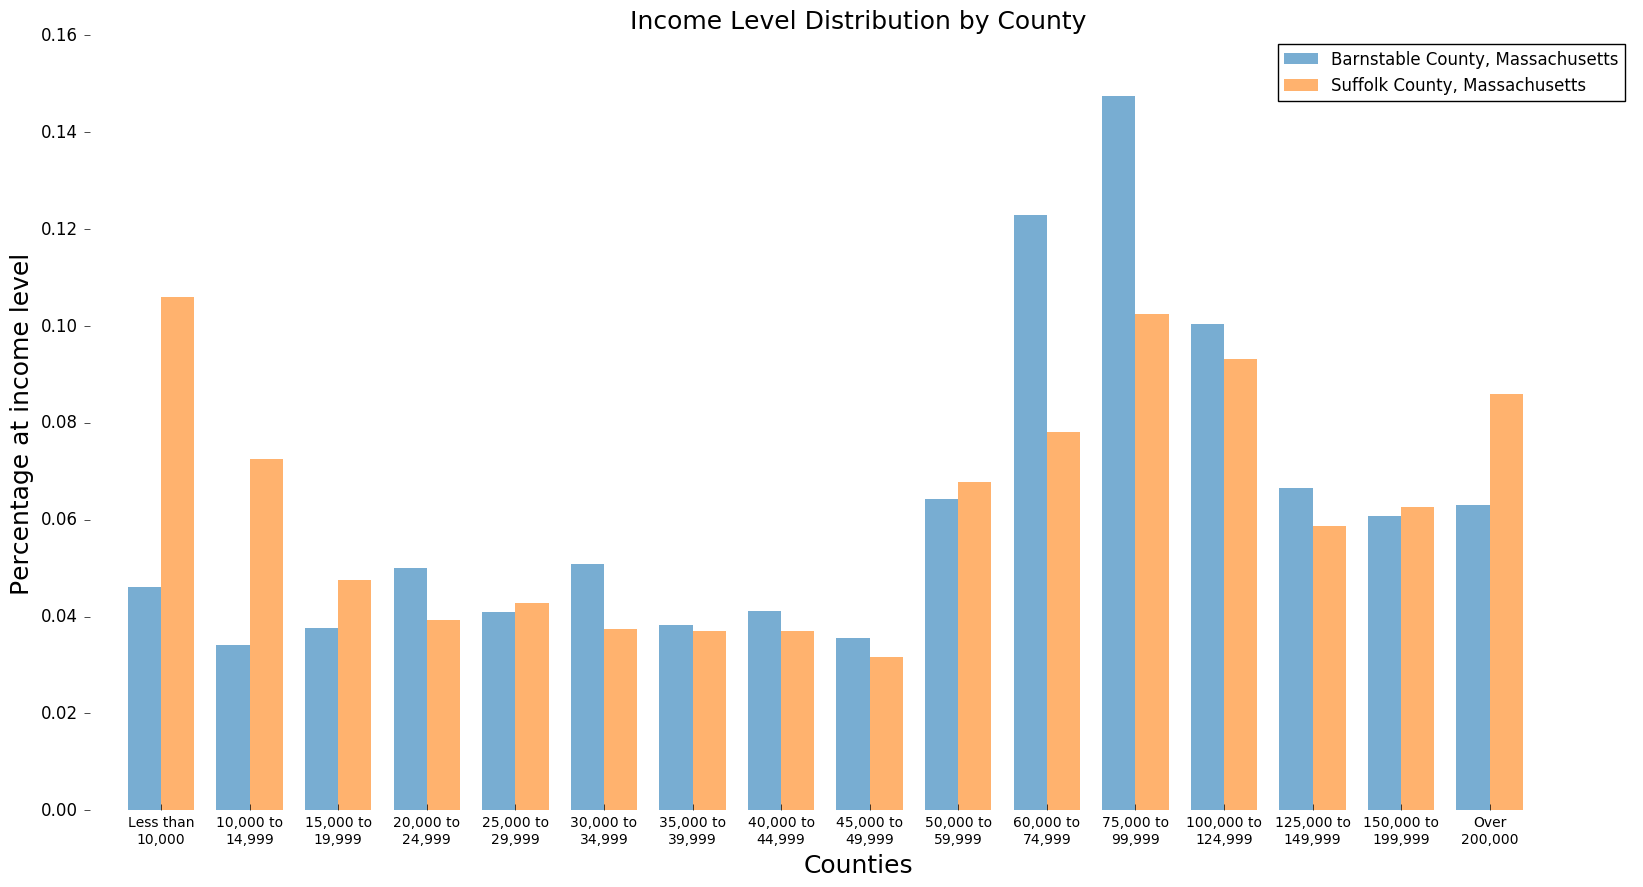

In [36]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

percentage = True

key = x['NAME']
n_groups = len(variables.keys())

fig, ax = plt.subplots(figsize=(20,10))

index = np.arange(1, n_groups*2+1, 2)
bar_width = 1.5/len(key)

opacity = 0.6

i = 0
for name in key:
    cols = variables.keys()
    data = x.loc[x['NAME']==name][cols].reindex_axis(sorted(cols), axis=1).as_matrix()[0]
    data = [float(val) for val in data]
    total = sum(data)
    if percentage: data = [val/total for val in data]
    indiv_plot = plt.bar(index + bar_width*i, data, bar_width,
                 alpha=opacity,
                 color=tableau20[i],
                 linewidth = 0,
                 label=name)
    i += 1
    
plt.xlabel('Counties', fontsize=18)
if percentage: 
    plt.ylabel('Percentage at income level', fontsize=18)
else:
    plt.ylabel('Number of people at income level', fontsize=18)
plt.title('Income Level Distribution by County', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(index + bar_width*len(key) / 2, [variables[k] for k in sorted(cols)], fontsize=10)

plt.legend()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.show()